In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model, metrics, preprocessing, cross_validation
from mlxtend.plotting import plot_decision_regions
from sklearn.kernel_approximation import RBFSampler
from matplotlib.colors import ListedColormap

c:\users\tanla\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
np.random.seed(0)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, 0)
pd.DataFrame(y_xor)

,0
0,0
1,0
2,1
3,1
4,1
5,0
6,0
7,0
8,1
9,1


In [3]:
%matplotlib inline

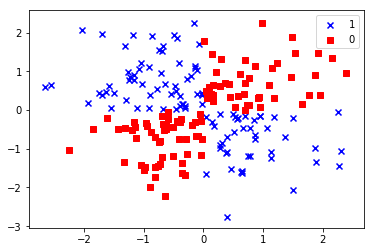

In [4]:
plt.scatter(X_xor[y_xor == 1, 0], X_xor[y_xor == 1, 1], c = 'b', marker = 'x', label = '1')
plt.scatter(X_xor[y_xor == 0, 0], X_xor[y_xor == 0, 1], c = 'r', marker = 's', label = '0')
plt.legend(loc = 'best')
plt.show()

In [5]:
X_std = X_xor
z = y_xor

In [6]:
rbf_feature = RBFSampler(gamma = 1, n_components = 100, random_state = 1)
X_std = rbf_feature.fit_transform(X_std)
print("X scale ", pd.DataFrame(X_std).shape)
pd.DataFrame(X_std).to_clipboard()

X scale  (200, 100)


In [7]:
clf_result = linear_model.SGDClassifier(loss = "hinge")

In [8]:
scores = cross_validation.cross_val_score(clf_result, X_std, z, cv = 10)
print("mean " , scores.mean())
print("std ", scores.std())

mean  0.895401002506
std  0.0739666056806


c:\users\tanla\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
c:\users\tanla\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3

In [10]:
X_train, X_test, train_label, test_label = cross_validation.train_test_split(X_std, z, test_size = 0.1, random_state = 1)
clf_result.fit(X_train, train_label)
pre = clf_result.predict(X_test)
ac_score = metrics.accuracy_score(test_label, pre)
print("correct answer rate ", ac_score)

correct answer rate  1.0


c:\users\tanla\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [15]:
x1_min, x1_max, x2_min, x2_max=-3, 3, -3, 3
x1_min, x1_max, x2_min, x2_max = -3, 3, -3, 3
resolution=0.02
xx1, xx2=np.meshgrid(np.arange(x1_min, x1_max, resolution),np.arange(x2_min, x2_max, resolution))
X=(np.array([xx1.ravel(), xx2.ravel()]).T)
plot_z=clf_result.predict(rbf_feature.fit_transform(X))
colors=('red','blue')
cmap=ListedColormap(colors[:len(np.unique(plot_z))])
plot_z=plot_z.reshape(xx1.shape)
plt.contourf(xx1,xx2, plot_z, alpha=0.4, cmap=cmap)

ValueError: Found array with 0 sample(s) (shape=(0, 2)) while a minimum of 1 is required.

In [13]:
x1_min, x1_max, x2_min, x2_max = 3, 3, -3, 3
resolution = 0.02
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
X = (np.array([xx1.ravel(), xx2.ravel()]).T)
# plot_z = clf_result.predict(rbf_feature.fit_transform(X))
plot_z = clf_result.predict(rbf_feature.fit_transform(X))
colors = ('red', 'blue')
cmap = ListedColormap(colors[:len(np.unique(plot_z))])
plot_z = plot_z.reshape(xx1.shape)
plt.contourf(xx1, xx2, plot_z, alpha = 0.4, cmap = cmap)

ValueError: Found array with 0 sample(s) (shape=(0, 2)) while a minimum of 1 is required.